In [0]:
%matplotlib inline

In [0]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm
from torch.optim.lr_scheduler import StepLR
import torch.optim as optim

In [0]:
# Calling our modules
import Utils
import resnet
import Model_train
import Model_test

In [4]:
transform = transforms.Compose(
    [transforms.RandomHorizontalFlip(),
     transforms.RandomCrop(32, padding=4),
     
     transforms.ToTensor(),

     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


 deer truck plane   cat


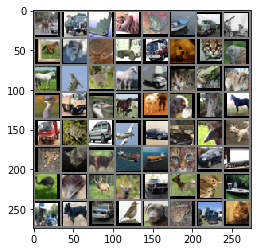

In [5]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
#imshow(torchvision.utils.make_grid(images))
Utils.imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [6]:
!pip install torchsummary
from torchsummary import summary



model = resnet.ResNet18()
use_cuda = torch.cuda.is_available()
model.device = torch.device("cuda" if use_cuda else "cpu")
model.to(model.device)
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [0]:
train_losses = []
test_losses = []
train_acc = []
test_acc = []

In [0]:
def model_call(model,criterion, device, trainloader, optimizer,scheduler,testloader, epoch):

  Model_train.train(model, criterion,device, trainloader, optimizer, scheduler,epoch, train_losses, train_acc)
  scheduler.step()
  Model_test.test(model, device, testloader, test_losses, test_acc)

In [9]:
#model =  Model.Net().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.95,weight_decay=0.0004)
scheduler = optim.lr_scheduler.OneCycleLR(optimizer,max_lr=0.1,total_steps=20)
EPOCHS = 20


for epoch in range(EPOCHS):
  print("EPOCH:", epoch+1)
  model_call(model,criterion, model.device, trainloader, optimizer,scheduler,testloader, epoch)

  0%|          | 0/782 [00:00<?, ?it/s]

EPOCH: 1


Loss=1.1724257469177246 Batch_id=781 Accuracy=46.46: 100%|██████████| 782/782 [01:00<00:00, 12.91it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -3.6751, Accuracy: 5288/10000 (52.88%)

EPOCH: 2


Loss=0.48913392424583435 Batch_id=781 Accuracy=61.50: 100%|██████████| 782/782 [01:00<00:00, 13.01it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -4.7644, Accuracy: 6584/10000 (65.84%)

EPOCH: 3


Loss=0.568748414516449 Batch_id=781 Accuracy=69.88: 100%|██████████| 782/782 [01:01<00:00, 12.64it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -5.5808, Accuracy: 7376/10000 (73.76%)

EPOCH: 4


Loss=1.2742218971252441 Batch_id=781 Accuracy=75.66: 100%|██████████| 782/782 [01:01<00:00, 12.70it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -5.8505, Accuracy: 7393/10000 (73.93%)

EPOCH: 5


Loss=0.8510774374008179 Batch_id=781 Accuracy=78.59: 100%|██████████| 782/782 [01:01<00:00, 12.72it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -6.0189, Accuracy: 7868/10000 (78.68%)

EPOCH: 6


Loss=0.8392713069915771 Batch_id=781 Accuracy=80.78: 100%|██████████| 782/782 [01:01<00:00, 12.72it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -6.2285, Accuracy: 7929/10000 (79.29%)

EPOCH: 7


Loss=0.3117138743400574 Batch_id=781 Accuracy=82.25: 100%|██████████| 782/782 [01:01<00:00, 12.76it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -5.9656, Accuracy: 7854/10000 (78.54%)

EPOCH: 8


Loss=0.25392431020736694 Batch_id=781 Accuracy=83.04: 100%|██████████| 782/782 [01:01<00:00, 12.78it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -5.9785, Accuracy: 7535/10000 (75.35%)

EPOCH: 9


Loss=0.9025830626487732 Batch_id=781 Accuracy=84.13: 100%|██████████| 782/782 [01:01<00:00, 12.71it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -6.3611, Accuracy: 7987/10000 (79.87%)

EPOCH: 10


Loss=0.5315309762954712 Batch_id=781 Accuracy=84.62: 100%|██████████| 782/782 [01:01<00:00, 12.82it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -6.6169, Accuracy: 8289/10000 (82.89%)

EPOCH: 11


Loss=0.4606820344924927 Batch_id=781 Accuracy=85.30: 100%|██████████| 782/782 [01:01<00:00, 12.63it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -5.8781, Accuracy: 8144/10000 (81.44%)

EPOCH: 12


Loss=0.9039471745491028 Batch_id=781 Accuracy=86.08: 100%|██████████| 782/782 [01:01<00:00, 12.70it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -6.9159, Accuracy: 8009/10000 (80.09%)

EPOCH: 13


Loss=0.3171871602535248 Batch_id=781 Accuracy=86.96: 100%|██████████| 782/782 [01:01<00:00, 12.76it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -6.9529, Accuracy: 8448/10000 (84.48%)

EPOCH: 14


Loss=0.3367614150047302 Batch_id=781 Accuracy=88.18: 100%|██████████| 782/782 [01:01<00:00, 12.68it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -7.1670, Accuracy: 8336/10000 (83.36%)

EPOCH: 15


Loss=0.14169198274612427 Batch_id=781 Accuracy=89.41: 100%|██████████| 782/782 [01:01<00:00, 12.66it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -7.5025, Accuracy: 8604/10000 (86.04%)

EPOCH: 16


Loss=0.1463731825351715 Batch_id=781 Accuracy=91.02: 100%|██████████| 782/782 [01:01<00:00, 12.82it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -7.9046, Accuracy: 8830/10000 (88.30%)

EPOCH: 17


Loss=0.18471303582191467 Batch_id=781 Accuracy=93.02: 100%|██████████| 782/782 [01:01<00:00, 12.79it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -8.5655, Accuracy: 8998/10000 (89.98%)

EPOCH: 18


Loss=0.30863678455352783 Batch_id=781 Accuracy=95.09: 100%|██████████| 782/782 [01:01<00:00, 12.74it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -9.1691, Accuracy: 9182/10000 (91.82%)

EPOCH: 19


Loss=0.4045155346393585 Batch_id=781 Accuracy=96.62: 100%|██████████| 782/782 [01:01<00:00, 12.66it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -9.4987, Accuracy: 9248/10000 (92.48%)

EPOCH: 20


Loss=0.41587570309638977 Batch_id=781 Accuracy=97.00: 100%|██████████| 782/782 [01:01<00:00, 12.70it/s]



Test set: Average loss: -9.4255, Accuracy: 9262/10000 (92.62%)



GroundTruth:    dog   cat   dog  ship


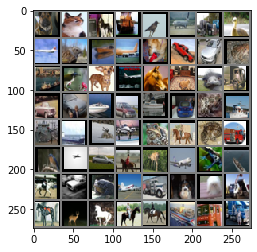

In [10]:
xdataiter = iter(testloader)
images, labels = dataiter.next()

Utils.imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [12]:
out_imag =[]
for i, data in enumerate(testloader, 0):
        # get the inputs
        out_imag = data[0].to(model.device)
outputs = model(out_imag)


_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:  horse   dog  ship plane


In [13]:
import Utils
# Printing total accuracy
Utils.total_accuracy(testloader,model,model.device)

Accuracy of the network on the 10000 test images: 92 %


In [14]:
# Printing classwise accuracy
Utils.class_accuracy(testloader, model,model.device)    

Accuracy of plane : 92 %
Accuracy of   car : 96 %
Accuracy of  bird : 84 %
Accuracy of   cat : 82 %
Accuracy of  deer : 89 %
Accuracy of   dog : 88 %
Accuracy of  frog : 92 %
Accuracy of horse : 96 %
Accuracy of  ship : 96 %
Accuracy of truck : 96 %
